# World Happy Index

##### Note : Make Sure to Open the file in excel.
Excel provides better understanding of data.
We can also perform the data cleaning in the excel. (InFact it's preferable to clean the data in excel)

## Importing the necessary Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

## Reading the dataset

In [3]:
file1 = pd.read_csv('./DataSets/WRH.csv')

In [4]:
file1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [5]:
file1.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1944,Zimbabwe,2016,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235
1948,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789,0.703,0.346


## EDA

### Checking for duplicates

In [6]:
file1.duplicated().sum()

0

There are no duplicates in this dataset

## Checking For Null Values

In [7]:
file1.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

<!-- * In my Opinion

The Data is a continuous Year Data.
So we can use the data forward or backward to fill th null values.  -->

In [8]:
from sklearn import impute

In [9]:
file2 = file1.groupby(file1['Country name']).transform(lambda x: x.ffill().bfill())

In [10]:
file2.isna().sum()

year                                 0
Life Ladder                          0
Log GDP per capita                  19
Social support                       1
Healthy life expectancy at birth    36
Freedom to make life choices         0
Generosity                          19
Perceptions of corruption           28
Positive affect                      2
Negative affect                      1
dtype: int64

In [11]:
file2.insert(0, 'Country name', file1['Country name'])

In [12]:
file2

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [13]:
file2.loc[25, :]

Country name                        Algeria
year                                   2010
Life Ladder                           5.464
Log GDP per capita                    9.287
Social support                         0.81
Healthy life expectancy at birth       64.5
Freedom to make life choices          0.593
Generosity                           -0.205
Perceptions of corruption             0.618
Positive affect                        0.55
Negative affect                       0.255
Name: 25, dtype: object

In [14]:
file2.loc[709, :]

Country name                        Hong Kong S.A.R. of China
year                                                     2020
Life Ladder                                             5.295
Log GDP per capita                                       11.0
Social support                                          0.813
Healthy life expectancy at birth                          NaN
Freedom to make life choices                            0.705
Generosity                                              0.067
Perceptions of corruption                                0.38
Positive affect                                         0.609
Negative affect                                          0.21
Name: 709, dtype: object

 Certain Countries don't have values of for any of those columns. So Let's fill the those values with -1 (To Indicate the absence of the data)
 
 Healthy life expectancy at birth 
 
 Freedom to make life choices                           
 
 Generosity                                             
 
 Positive affect
 
 Perceptions of corruption                              
                              

In [15]:
file2.fillna(-1, inplace=True)

In [16]:
file2.loc[709, :]

Country name                        Hong Kong S.A.R. of China
year                                                     2020
Life Ladder                                             5.295
Log GDP per capita                                       11.0
Social support                                          0.813
Healthy life expectancy at birth                         -1.0
Freedom to make life choices                            0.705
Generosity                                              0.067
Perceptions of corruption                                0.38
Positive affect                                         0.609
Negative affect                                          0.21
Name: 709, dtype: object

### We can also drop the values. Based on the Business case.

But in this case i preferred ffill ad bfill through groupby 

In [17]:
file2

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [18]:
# Analysis on countries.

print(file2['Country name'].nunique())
print("-"*50)
print(file2['Country name'].unique())

166
--------------------------------------------------
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya'

In [19]:
values = {'Max':[], 'Min':[], 'Average':[]}
for i in file2['Country name'].unique():
    country_data = file2[file2['Country name'] == i]
    max_value = country_data['Life Ladder'].max()
    min_value = country_data['Life Ladder'].min()
    max_year = country_data.loc[country_data['Life Ladder'].idxmax(), 'year']
    min_year = country_data.loc[country_data['Life Ladder'].idxmin(), 'year']
    average_Value = country_data['Life Ladder'].mean()
    values['Max'].append(f"{max_value} ({max_year})")
    values['Min'].append(f"{min_value} ({min_year})")
    values['Average'].append(average_Value)

lifeLadder = pd.DataFrame(values, index = file2['Country name'].unique())  

In [20]:
lifeLadder

,Max,Min,Average
Afghanistan,4.758 (2010),2.375 (2019),3.594667
Albania,5.867 (2011),4.511 (2016),5.019385
Algeria,6.355 (2014),4.745 (2019),5.389875
Angola,5.589 (2011),3.795 (2014),4.420250
Argentina,6.776 (2011),5.793 (2018),6.310133
...,...,...,...
Venezuela,7.478 (2010),4.041 (2016),6.019867
Vietnam,5.767 (2011),5.023 (2013),5.305857
Yemen,4.809 (2009),2.983 (2015),3.912250
Zambia,5.26 (2009),3.307 (2019),4.551714


Country with max Life Ladder across all the years.

In [21]:
print(lifeLadder['Max'].idxmax())
print(lifeLadder['Max'].max())

Denmark
8.019 (2005)


In [22]:
file2[file2['year'] == file2['year'].max()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891,0.679,0.265
51,Argentina,2020,5.901,9.850,0.897,69.2,0.823,-0.122,0.816,0.764,0.342
79,Australia,2020,7.137,10.760,0.937,74.2,0.905,0.210,0.491,0.769,0.205
92,Austria,2020,7.213,10.851,0.925,73.6,0.912,0.011,0.464,0.769,0.206
117,Bahrain,2020,6.173,10.620,0.848,69.7,0.945,0.132,0.525,0.790,0.297
...,...,...,...,...,...,...,...,...,...,...,...
1850,United States,2020,7.028,11.001,0.937,68.1,0.850,0.034,0.678,0.787,0.295
1865,Uruguay,2020,6.310,9.937,0.921,69.2,0.908,-0.084,0.491,0.807,0.265
1893,Venezuela,2020,4.574,9.073,0.805,66.9,0.612,-0.169,0.811,0.722,0.396
1933,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810,0.691,0.345


In [23]:
print(file2.loc[file2[file2['year'] == file2['year'].max()]['Life Ladder'].idxmax(), 'Country name'])
print(file2[file2['year'] == file2['year'].max()]['Life Ladder'].max())

Finland
7.889


we can observe that the max of the life ladder is achieved by denmark in 2005.

The current highest is from finland. Which is less than the denmark on year 2005.

In [24]:
file2[file2['year'] ==  2005]['Life Ladder'].mean()

6.446259259259258

In [25]:
file2[file2['year'] ==  2020]['Life Ladder'].mean()

5.8405999999999985

In [26]:
((file2[file2['year'] ==  2020]['Life Ladder'].mean() - file2[file2['year'] ==  2005]['Life Ladder'].mean())/file2[file2['year'] ==  2020]['Life Ladder'].mean())*100

-10.369812335363827

We can observe that the global life ladder has decreased from the year 2005 to 2020 by 10%. (Probably Dur to covid-19 Pandemic)

In [27]:
((file2[file2['year'] ==  2006]['Life Ladder'].mean() - file2[file2['year'] ==  2005]['Life Ladder'].mean())/file2[file2['year'] ==  2006]['Life Ladder'].mean())*100

-24.040498238810077

From the above Observation we can see that as the years passes the life ladder is decreasing globally.

In [28]:
from numpy import sort


years = sort(file2['year'].unique())
for i in range(1,len(file2['year'].unique())):
    year1 = years[i-1]
    year2 = years[i]
    val = ((file2[file2['year'] ==  year2]['Life Ladder'].mean() - file2[file2['year'] ==  year1]['Life Ladder'].mean())/file2[file2['year'] ==  year2]['Life Ladder'].mean())*100
    print(f"{year2} : {val}")

2006 : -24.040498238810077
2007 : 4.085721995053322
2008 : 0.004329255543072162
2009 : 0.7174783318434365
2010 : 0.7120458995741566
2011 : -1.340766184227113
2012 : 0.36135598846632266
2013 : -0.9118715649533841
2014 : -0.1028267371673672
2015 : 0.27783453432365907
2016 : -0.08438021339630103
2017 : 1.1158376481041756
2018 : 0.7098081388932673
2019 : 1.2821052818240242
2020 : 4.618223203856487


From 2005 to 2020.

The life ladder value has decreased a lot.

From 2006 to 2016, We can see that the global life ladder hasn't seen much of increase (We can only see  around 0 to 4 % increase).

But From the year 2017, we can see that the life ladder is increasing little by little (But not achieved the highest life ladder since 2005)

# 🗒️ Answer
The global life ladder, which measures subjective well-being, decreased from 2005 to 2016 due to various factors such as economic instability, political unrest, and social challenges [[5](https://www.researchgate.net/figure/Changes-in-Happiness-from-2005-2008-to-2016-2018-Part-1_fig5_332264007)]. These factors can impact people's perceptions of their overall life satisfaction and happiness. Additionally, changes in income inequality, health outcomes, and environmental concerns may have contributed to the decline in subjective well-being during this period [[2](https://ourworldindata.org/happiness-and-life-satisfaction)].

# 🌐 Sources
1. [ResearchGate - Changes in Happiness from 2005-2008 to 2016-2018 (Part ...](https://www.researchgate.net/figure/Changes-in-Happiness-from-2005-2008-to-2016-2018-Part-1_fig5_332264007)
2. [Our World in Data - Happiness and Life Satisfaction](https://ourworldindata.org/happiness-and-life-satisfaction)

## Social Support.

In [29]:
file2['Social support'].max()

0.987

In [30]:
file2.iloc[file2['Social support'].idxmax(), [0,1,4]] # type: ignore

Country name      New Zealand
year                     2015
Social support          0.987
Name: 1233, dtype: object

In [31]:
# The Life Ladder for that year in New Zealand 

file2.iloc[file2['Social support'].idxmax(), 2]  # type: ignore

7.418

In [32]:
file2['Social support'].corr(file2['Life Ladder'])

0.6590242332991693

we can observe a little of correlation between social support and life ladder. 

In [33]:
file2[file2['year'] == 2020]['Social support'].mean()

0.8389157894736843

In [34]:
from numpy import sort


years = sort(file2['year'].unique())
for i in range(1,len(file2['year'].unique())):
    year1 = years[i-1]
    year2 = years[i]
    val = ((file2[file2['year'] ==  year2]['Social support'].mean() - file2[file2['year'] ==  year1]['Social support'].mean())/file2[file2['year'] ==  year2]['Social support'].mean())*100
    print(f"{year2} : {val}")

2006 : -7.369915790741982
2007 : -3.081491649657314
2008 : -3.3698274692513164
2009 : 4.279085790357678
2010 : 1.5973335752660685
2011 : -5.352128502291767
2012 : 2.300354451920641
2013 : -0.3110310581110499
2014 : 0.051757564498744676
2015 : -1.0632538752824903
2016 : 1.651920406528391
2017 : -0.7780926908440604
2018 : 0.8271386541318162
2019 : 0.5443978465497887
2020 : 2.637228084704155


We can observe the Same Trend as the Life Ladder with little bit of changes in the Social support.

The Social support has decreased a lot compared to increasing. And it's increasing stably from the year 2018(More like no decrement)

we can observe that the Social support has increased a lot from the year 2008 to 2009. (Percentage wise)

# 🗒️ Answer
The increase in social support from 2008 to 2009 could be attributed to factors such as community initiatives, government policies, or changes in societal attitudes, as people often come together during times of economic downturn or crisis to provide support [[6](https://worldhappiness.report/ed/2019/changing-world-happiness/)]. However, the subsequent decrease in social support could be influenced by economic instability, changes in government policies, or shifts in societal dynamics. Economic downturns, changes in employment rates, or shifts in government priorities may strain social support systems and impact the availability of resources, leading to a decline in overall social support [[2](https://ourworldindata.org/happiness-and-life-satisfaction)]. Additionally, changes in social norms or cultural factors could play a role in shaping perceptions of social support over time.

# 🌐 Sources
2. [Happiness and Life Satisfaction](https://ourworldindata.org/happiness-and-life-satisfaction)
6. [Changing World Happiness](https://worldhappiness.report/ed/2019/changing-world-happiness/)

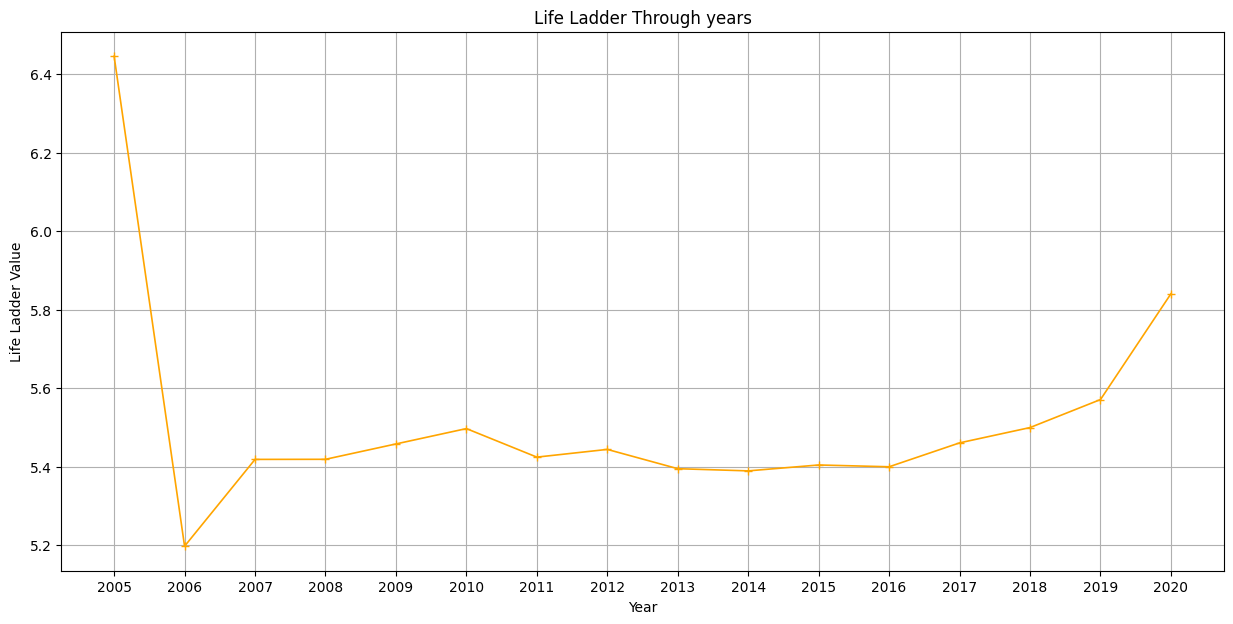

In [35]:
plt.figure(figsize = (15, 7))
plt.plot(file2.groupby('year')['Life Ladder'].mean(), color = 'orange', linewidth = 1.2, label = 'Life Ladder', marker = '+')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Life Ladder Value")
plt.title("Life Ladder Through years")
plt.xticks(np.arange(2005, 2021))
plt.show()

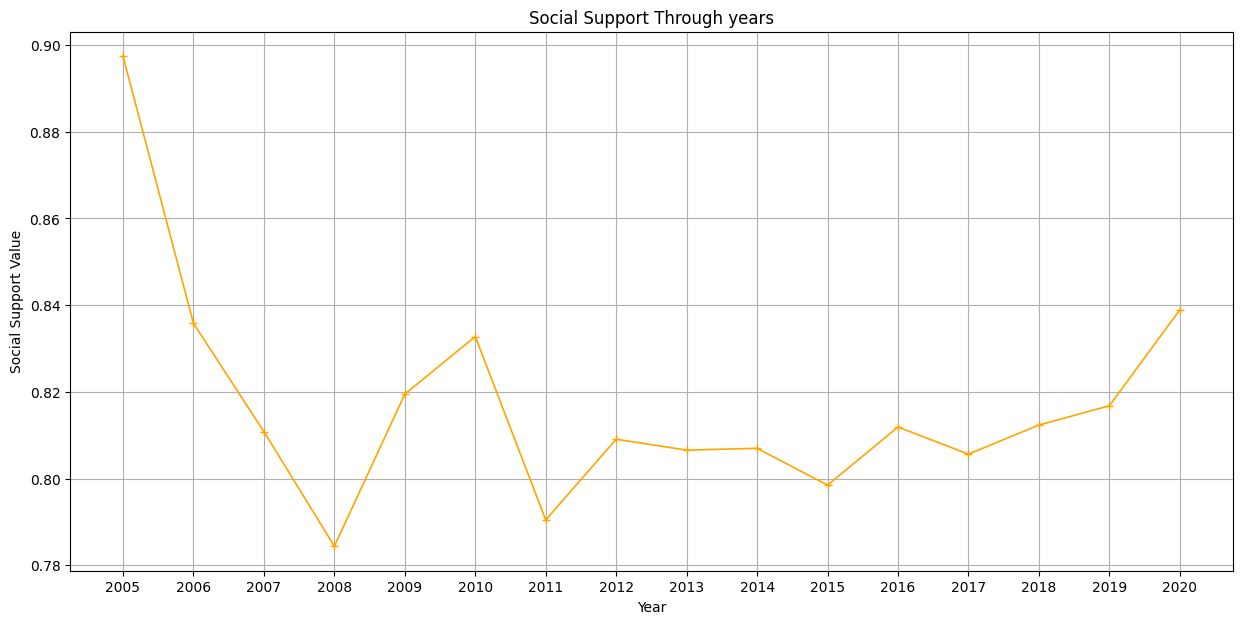

In [36]:
plt.figure(figsize = (15, 7))
plt.plot(file2.groupby('year')['Social support'].mean(), color = 'orange', linewidth = 1.2, label = 'Life Ladder', marker = '+')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Social Support Value")
plt.title("Social Support Through years")
plt.xticks(np.arange(2005, 2021))
plt.show()